In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from numpy import genfromtxt
import scipy.optimize as optimization
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
Threshhold_current = 31.2 #mA
#Resonant flourecence occures between 4.64 and 4.78 Volts
#as offset is increased, resonant flourecence stops occuring, then occures again as offset continues to increase
#as amplitude is descreased, intensity due to resoant flourecence decreases

/Users/anthonybardessono/anaconda/lib/python2.7/site-packages/matplotlib/lines.py:503: RuntimeWarning: invalid value encountered in greater_equal
  return np.alltrue(x[1:] - x[0:-1] >= 0)


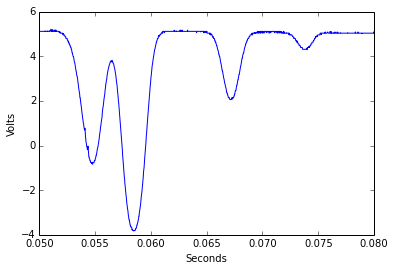

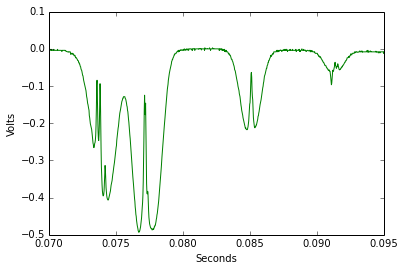

In [3]:
####################
f = genfromtxt('2.csv', delimiter=',')

time_1 = f.T[0]
volts_1 = f.T[1]

plt.plot(time_1, volts_1, 'b')
plt.xlabel('Seconds')
plt.ylabel('Volts')
plt.xlim(.05, 0.08)

plt.show()


################
g = genfromtxt('4.csv', delimiter=',')

time_2 = g.T[0]
volts_2 = g.T[1]

plt.plot(time_2, volts_2, 'g')
plt.xlabel('Seconds')
plt.ylabel('Volts')
plt.xlim(.07, .095)

plt.show()

In [20]:
print min(volts_1[142:273])
print min(volts_1[600:800])

-0.83505028
2.05942205


In [26]:
time_max_1 = .0548
time_max_2 = .0672
delt = 67.2 - 54.8 #ms
conversion = 6.8/delt * 10**3
print conversion #MHz/ms

548.387096774


2.73512453167 -1548.28089828 -1222763.03206


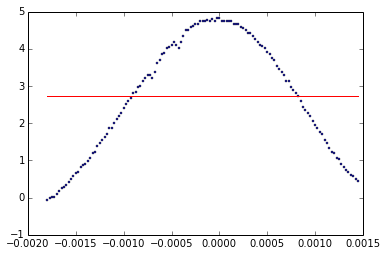

In [40]:
a = 142
b = 273

x = time_1[a: b] - .0548
y = volts_1[a: b]

y = -y + 4

def gaussian(x, *p):
    C, x0, sigma = p
    return C*numpy.exp(-4*np.log(2)*((x-x0)**2)/(2.*sigma**2))

p0 = [5.0, 0.0, 2.0]

a, b = curve_fit(gaussian, x, y, p0)
C = a[0]
x0 = a[1]
delf = a[2]
print C, x0, delf

fit = lambda x: C*numpy.exp(-4*np.log(2)*((x-x0)**2)/(2.*delf**2))

plt.plot(x, y, 'bo', markersize = 2)
plt.plot(x, fit(x), 'r')
plt.show()